In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

该数据自然地可视化为条形图，每组一个条形图。为此，我们将首先生成figure.Figureand 的实例axes.Axes。该图就像一个画布，并且轴是该画布的一部分，我们将在该画布上进行特定的可视化处理。

<BarContainer object of 10 artists>

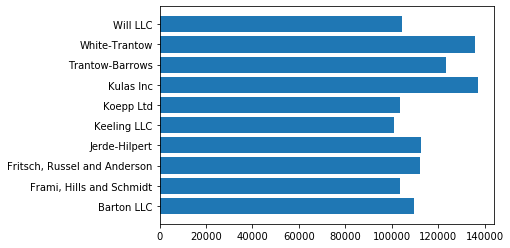

In [6]:
fig, ax = plt.subplots() #返回figure和坐标轴对象
ax.barh(group_names,group_data)

In [7]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [8]:
plt.style.use('fivethirtyeight')#样式控制着很多东西，例如颜色，线宽，背景等

<BarContainer object of 10 artists>

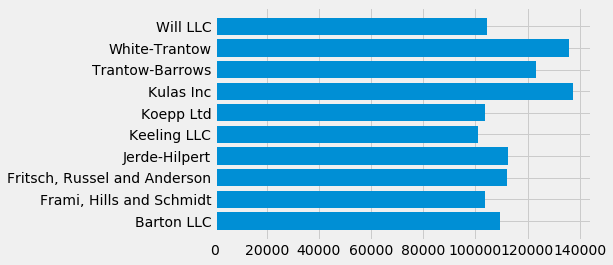

In [9]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

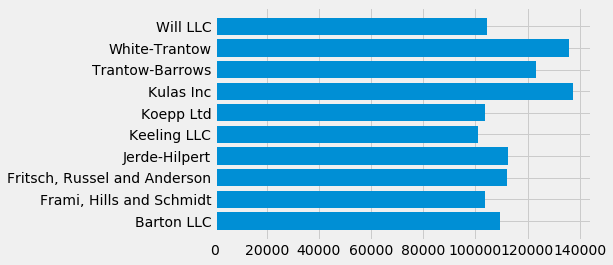

In [10]:
'''现在，我们已经有了所需的总体外观图，因此我们对其进行微调，以使其可以打印。首先，让我们在x轴上旋转标签，以使其更清晰地显示。我们可以使用以下axes.Axes.get_xticklabels()方法访问这些标签'''
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

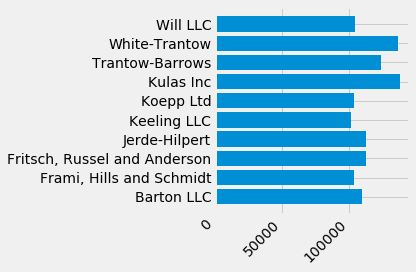

In [17]:
'''如果我们想一次设置许多项目的属性，则使用该pyplot.setp()功能很有用。这将获取一个Matplotlib对象列表（或多个列表），并尝试为每个对象设置一些样式元素'''
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

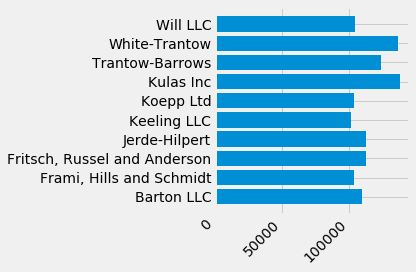

In [18]:
'''看起来像这样切断了底部的一些标签。我们可以告诉Matplotlib自动为我们创建的图中的元素腾出空间。为此，我们将设置autolayoutrcParams 的值。有关使用rcParams控制图的样式，布局和其他功能的更多信息，请参见 使用样式表和rcParams自定义Matplotlib。'''
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

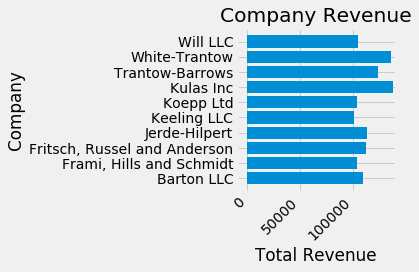

In [19]:
#接下来，我们将在图上添加标签。要通过OO接口执行此操作，我们可以使用该axes.Axes.set()方法来设置此Axes对象的属性。
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

#我们还可以使用pyplot.subplots() 函数调整该图的大小。我们可以使用figsizekwarg 做到这一点

注意

NumPy中的索引遵循格式（行，列），而figsize kwarg遵循格式（宽度，高度）。这遵循可视化的惯例，不幸的是，这些惯例与线性代数的惯例不同。

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

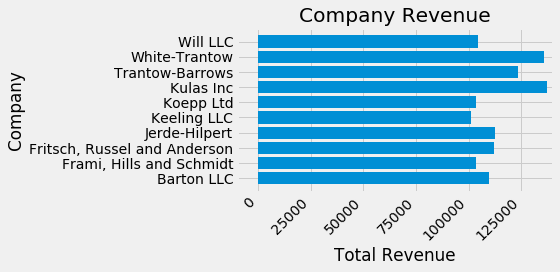

In [22]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

#可以在一个Axes实例里画多个不同的plot元素 只需要使用axes实例的方法

'''对于标签，我们可以通过使用matplotlib.ticker.FuncFormatter类以函数的形式指定自定义格式指南。在下面，我们将定义一个函数，该函数将整数作为输入，并返回一个字符串作为输出。'''

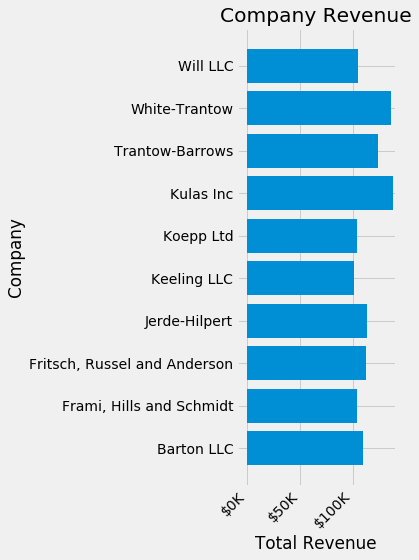

In [32]:
import matplotlib
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = matplotlib.ticker.FuncFormatter(currency)
'''
然后，我们可以将此格式化程序应用于绘图上的标签。为此，我们将使用xaxis轴的属性。这使您可以在绘图上的特定轴上执行操作。'''
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)

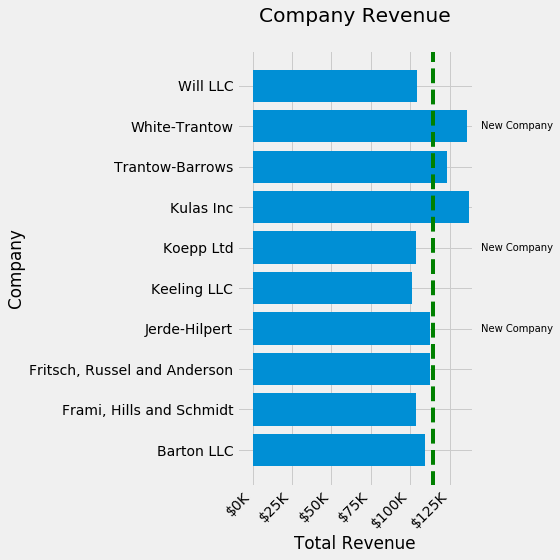

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='g')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

我们可以用figure.Figure.savefig()来储存我们的图像
transparent=True 如果格式支持，则使保存的图形的背景透明。
dpi=80 控制输出的分辨率（每平方英寸的点数）。
bbox_inches="tight" 使图形的边界适合我们的绘图。

In [38]:
# Uncomment this line to save the figure.
#fig.savefig('./sales.png', transparent=False, dpi=80, bbox_inches="tight")